<a href="https://colab.research.google.com/github/RongBin713/Assignment/blob/main/Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A.

In [2]:
!pip install mido
!pip install pretty_midi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 43.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592287 sha256=aa83dd33c25a28874cdeb2d21c95b30bb108fb1f568797b5729bc57999cb3e31
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi


In [18]:
!pip install mido
!pip install pretty_midi

In [19]:
import pretty_midi

# Load MIDI file
midi_data = pretty_midi.PrettyMIDI('/content/Attack on Titan - Jiyuu no Tsubasa.mid','/content/Frieren Beyond Journeys End .mid','/content/Michishirube (VIOLET Evergarden) MIDI.mid')

B.

In [20]:
notes = []
for instrument in midi_data.instruments:
    for note in instrument.notes:
        notes.append(note.pitch)

# Find the most common notes
from collections import Counter
note_counts = Counter(notes)
most_common_notes = note_counts.most_common(5)
print(most_common_notes)

[(76, 163), (74, 143), (81, 136), (45, 131), (72, 123)]


C.

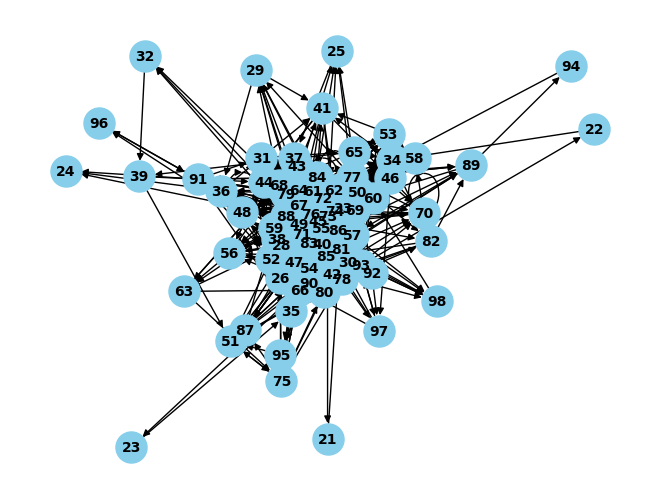

In [22]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a transition matrix
transition_matrix = np.zeros((128, 128))
for i in range(len(notes) - 1):
    transition_matrix[notes[i], notes[i + 1]] += 1

# Create a graph
G = nx.DiGraph()
for i in range(128):
    for j in range(128):
        if transition_matrix[i, j] > 0:
            G.add_edge(i, j, weight=transition_matrix[i, j])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
plt.show()

D.


In [27]:
from pydub import AudioSegment
from pydub.generators import Sine

# Generate a 30-second simple melody using the most common notes
melody = AudioSegment.silent(duration=0)
duration_per_note = 3000  # duration of each note in milliseconds (3 seconds per note)

# Repeat the most common notes to fill 30 seconds
while len(melody) < 30000:  # 30 seconds in milliseconds
    for note, _ in most_common_notes[:10]:
        sine_wave = Sine(note).to_audio_segment(duration=duration_per_note)
        melody += sine_wave
        if len(melody) >= 30000:
            break

# Trim the melody to exactly 30 seconds
melody = melody[:30000]

# Export the audio file
melody.export('B240074A.wav', format='wav')

print("The 30-second audio piece has been created and saved as 'B240074A.wav'.")

The 30-second audio piece has been created and saved as 'B240074A.wav'.
